
# Linear Regression Example

This example uses the truck sales dataset to illustrate ordinary least-squares (OLS), or linear regression. The
plot shows the line that linear regression learns, which best minimizes the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation. We also compute the residual sum of squares and the variance score for the model.



y = 3.388637 + -0.057268x
Mean squared error: 0.184517
Variance score: 0.011962


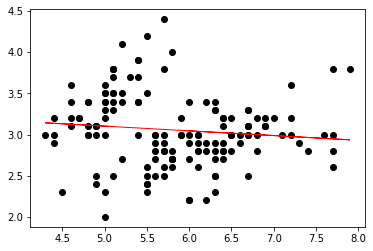

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# Get data
df = pd.read_csv(
    filepath_or_buffer='data/iris.data', 
    header=None)
data = df.iloc[:,:].values
X = data[:,0].reshape(-1, 1)
Y = data[:,1].reshape(-1, 1)

# Train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(X, Y)
slope = regr.coef_[0][0]
intercept = regr.intercept_

print("y = %f + %fx" %(intercept, slope))
print("Mean squared error: %f"
      % np.mean((regr.predict(X) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % regr.score(X, Y))

# Plot outputs
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='red',
          linewidth=1)
plt.show()

In the cell below, we load a subset of the Iris dataset from UCI, specifically all the samples for the "Iris Setosa" flower. The function `model` finds the OLS model for a pair of features in the data and computes the residual sum of squares and the variance score for that model. The parameters `v1` and `v2` are the names of the X and Y variables.

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None)
data = df.iloc[:,:].values
data = data[data[:,4] == "Iris-setosa"][:,:4]

def model(X, Y, v1="A", v2="B"):
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    slope = regr.coef_[0][0]
    intercept = regr.intercept_[0]

    print("%s = %f + %fx%s" %(v2, intercept, slope, v1))
    sse = np.sum((regr.predict(X) - Y) ** 2)
    print("Sum of squared errors: %f" % sse)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %f' % regr.score(X, Y))
    return slope, intercept, sse, v1, v2


Exercise
======

The samples have 4 features. For each combination of features (each pair or features), consider one of the variables as predictor and the other as response and use the function `model` to find the OLS model that best fits the data. Report the model with the smallest SSE score.

In [3]:
import math
lowest_sse = math.inf
columns = df.columns[:4]
chosen_model = ()
for i in range(4):
    for j in range(4):
        if i!=j:
            slope, intercept, sse, v1, v2 = model(data[:,i], data[:,j], v1=columns[i], v2=columns[j])
            if sse < lowest_sse:
                lowest_sse = sse
                chosen_model = (slope, intercept, sse, v1, v2)

1 = -0.623012 + 0.807234x0
Sum of squared errors: 3.146569
Variance score: 0.557681
2 = 0.813768 + 0.129891x0
Sum of squared errors: 1.372483
Variance score: 0.069630
3 = -0.180937 + 0.084886x0
Sum of squared errors: 0.519331
Variance score: 0.077892
0 = 2.644660 + 0.690854x1
Sum of squared errors: 2.692927
Variance score: 0.557681
2 = 1.188976 + 0.080463x1
Sum of squared errors: 1.429143
Variance score: 0.031221
3 = -0.025258 + 0.078776x1
Sum of squared errors: 0.519054
Variance score: 0.078385
0 = 4.221204 + 0.536063x2
Sum of squared errors: 5.664281
Variance score: 0.069630
1 = 2.849946 + 0.388015x2
Sum of squared errors: 6.891700
Variance score: 0.031221
3 = -0.033080 + 0.189262x2
Sum of squared errors: 0.510358
Variance score: 0.093825
0 = 4.782102 + 0.917614x3
Sum of squared errors: 5.613977
Variance score: 0.077892
1 = 3.175213 + 0.995028x3
Sum of squared errors: 6.556186
Variance score: 0.078385
2 = 1.343040 + 0.495739x3
Sum of squared errors: 1.336790
Variance score: 0.093825


In [4]:
print('Details of model with smallest SSE:')
print('Slope of the model :%f' %chosen_model[0])
print('Intercept of the model: %f' %chosen_model[1])
print('SSE for the model: %f' % chosen_model[2])

Details of model with smallest SSE:
Slope of the model :0.189262
Intercept of the model: -0.033080
SSE for the model: 0.510358
